In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [4]:
data = pd.read_csv('student.csv')

In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [7]:
data.shape

(1000, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
data['gender'].dtype

dtype('O')

In [14]:
data['gender'].dtype=='O'

True

In [15]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [16]:
cat_col=[fea for fea in data.columns if data[fea].dtype == 'O']

In [17]:
num_col=[fea for fea in data.columns if data[fea].dtype != 'O']

In [18]:
data[num_col]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [19]:
data[cat_col]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [20]:
data.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

# Missing Values

In [21]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [22]:
data.isnull().sum().sum()

0

In [23]:
data.duplicated().sum()

0

In [24]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [25]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [27]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [28]:
data.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [29]:
data.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

<AxesSubplot:xlabel='math score', ylabel='Density'>

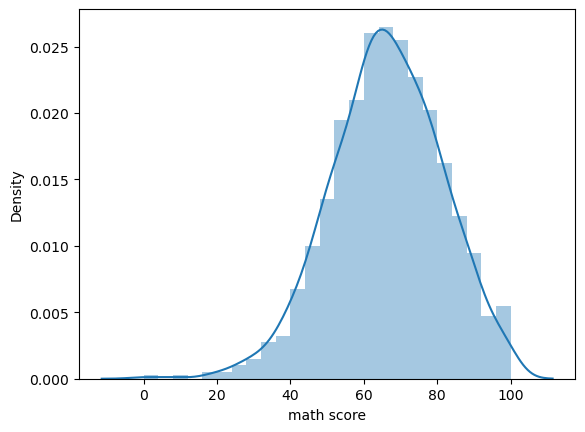

In [31]:
sns.distplot(data['math score'])

In [32]:
data['Average']=(data['math score']+data['reading score']+data['writing score'])/3

In [33]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [36]:
data.groupby(['gender']).mean()

,math score,reading score,writing score,Average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [37]:
data.groupby(['gender']).count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


In [51]:
data.groupby('parental level of education')['Average'].describe().head().style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
parental level of education,,,,,,,,
associate's degree,222.000000,69.569069,13.670914,31.666667,58.666667,69.666667,79.000000,100.000000
bachelor's degree,118.000000,71.923729,13.946609,39.000000,64.083333,71.166667,80.666667,100.000000
high school,196.000000,63.096939,13.510583,18.333333,53.916667,65.000000,72.666667,95.666667
master's degree,59.000000,73.598870,13.601017,44.666667,63.166667,73.333333,85.500000,97.666667
some college,226.000000,68.476401,13.710974,23.333333,60.000000,68.666667,78.000000,99.000000


In [54]:
#Find out the number of student having average is less than 30
(data['Average']<30).sum()

9

In [61]:
data[data['Average'] < 30].count()

gender                         9
race/ethnicity                 9
parental level of education    9
lunch                          9
test preparation course        9
math score                     9
reading score                  9
writing score                  9
Average                        9
dtype: int64

In [64]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Average'],
      dtype='object')

In [65]:
data_num=data[num_col]

In [66]:
data_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [67]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [68]:
from scipy.stats import normaltest

In [69]:
normaltest(data_num['reading score'])[1]*100

0.3853758403576582

In [71]:
#IF P VALUE IS GREATER THAN 0.05 THEN IT IS NORMALLY DISTRIBUTED

<AxesSubplot:xlabel='reading score', ylabel='Density'>

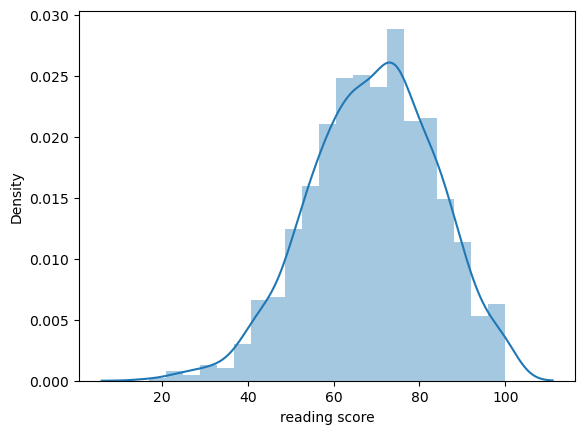

In [72]:
sns.distplot(data_num['reading score'])

In [73]:
#outlier

<AxesSubplot:>

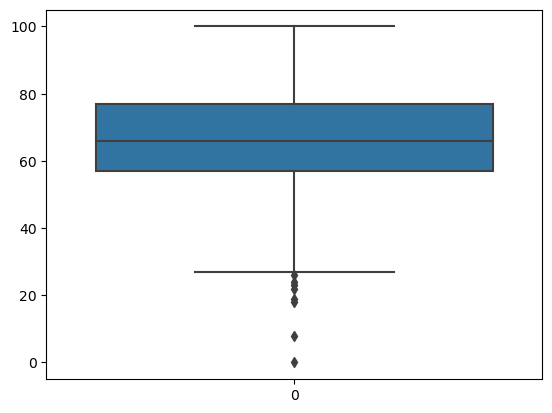

In [75]:
sns.boxplot(data=data['math score'])

<AxesSubplot:>

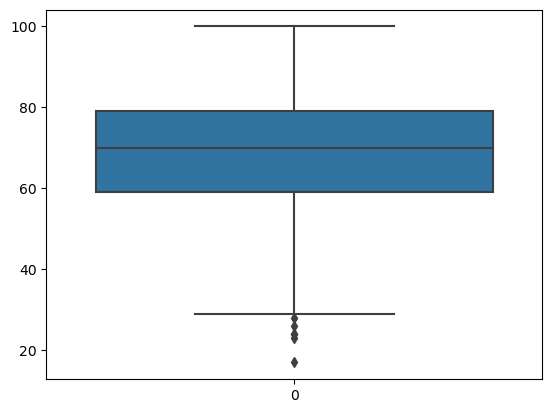

In [76]:
sns.boxplot(data=data['reading score'])

<AxesSubplot:>

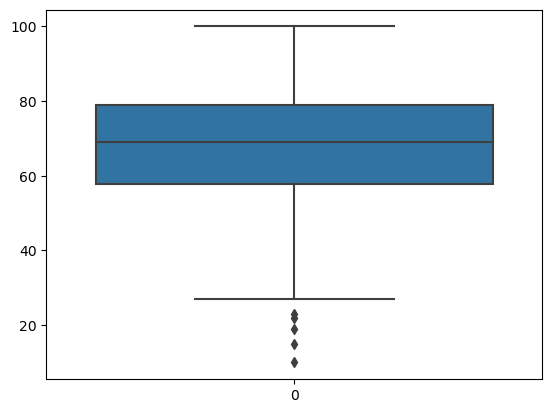

In [77]:
sns.boxplot(data=data['writing score'])

In [104]:
q1=data['math score'].quantile(0.25)

In [105]:
q3=data['math score'].quantile(.75)

In [106]:
IQR=q3-q1

In [107]:
upper_limit=q3+(1.5*IQR)

In [108]:
upper_limit

107.0

In [109]:
Lower_limit=q1-(1.5*IQR)

In [110]:
Lower_limit

27.0

In [111]:
data['math score'].quantile(1.0)

100.0

Forluma

UpperLimit=q3+1.5*IQR

86+1.5(86-47)

86+58.5=144.5

In [118]:
data[data['math score']<Lower_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average


In [119]:
data[data['math score']>upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average


Now we need to delete lower limit data

In [117]:
data.drop(data.loc[data['math score']<Lower_limit].index,inplace=True)

# Graph Analysis

In [120]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


<AxesSubplot:xlabel='gender', ylabel='count'>

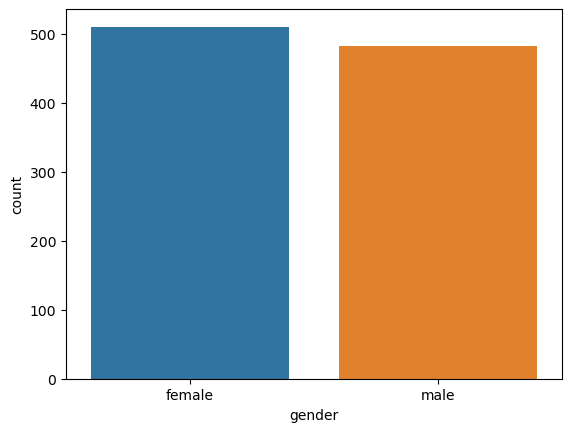

In [121]:
sns.countplot(data['gender'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

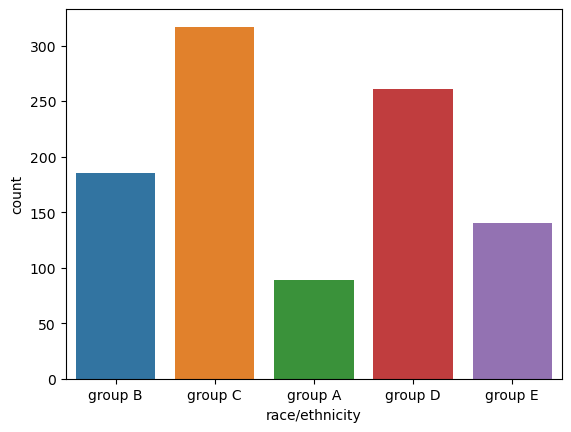

In [122]:
sns.countplot(data['race/ethnicity'])

In [131]:
df=data.groupby('gender').mean()
#what we did in further step is that we made some group with respect to average, math score etc

In [132]:
df['Average'][0]

70.24901960784314

In [133]:
df['Average'][1]

65.8374827109267

In [135]:
df['math score'][0]

64.35686274509804

In [136]:
df['math score'][1]

68.72821576763485

In [ ]:
female_score=df['Average'][0],df['math score'][0]

In [140]:
male_score=df['Average'][1],df['math score'][1]

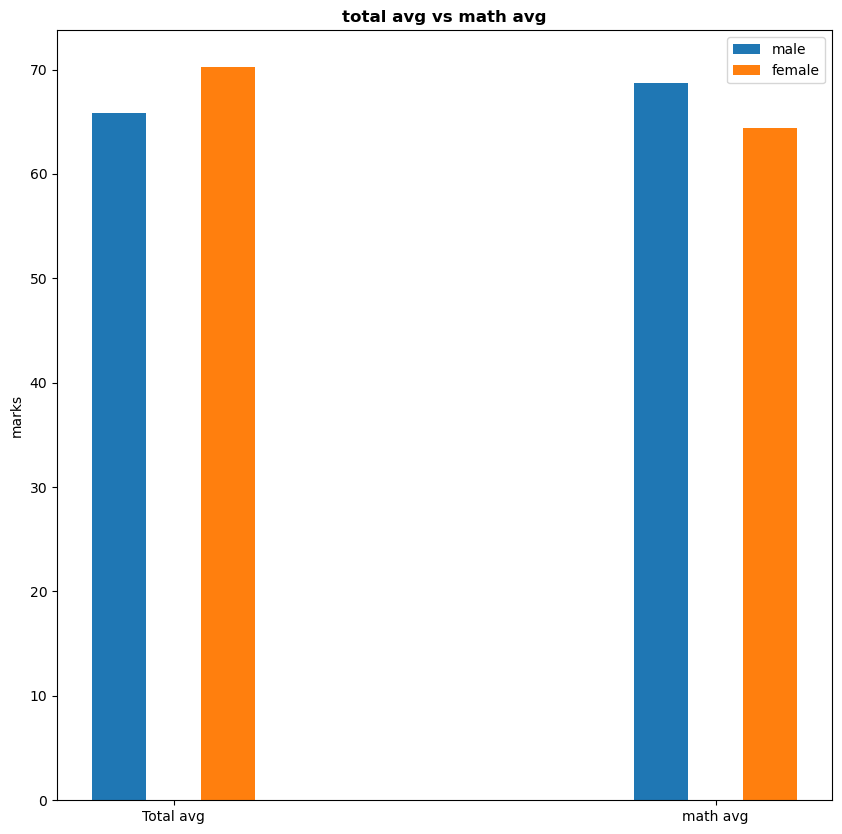

In [145]:
plt.figure(figsize=(10,10))
X=['Total avg','math avg']
female_score=df['Average'][0],df['math score'][0]
male_score=df['Average'][1],df['math score'][1]
X_axis=np.arange(len(X))
plt.bar(X_axis-0.1,male_score,0.1,label='male')
plt.bar(X_axis+0.1,female_score,0.1,label='female')

plt.xticks(X_axis,X)
plt.ylabel("marks")
plt.title("total avg vs math avg",fontweight='bold')
plt.legend()
plt.show()

In [142]:
female_score

(70.24901960784314, 64.35686274509804)

In [139]:
male_score

(65.8374827109267, 68.72821576763485)

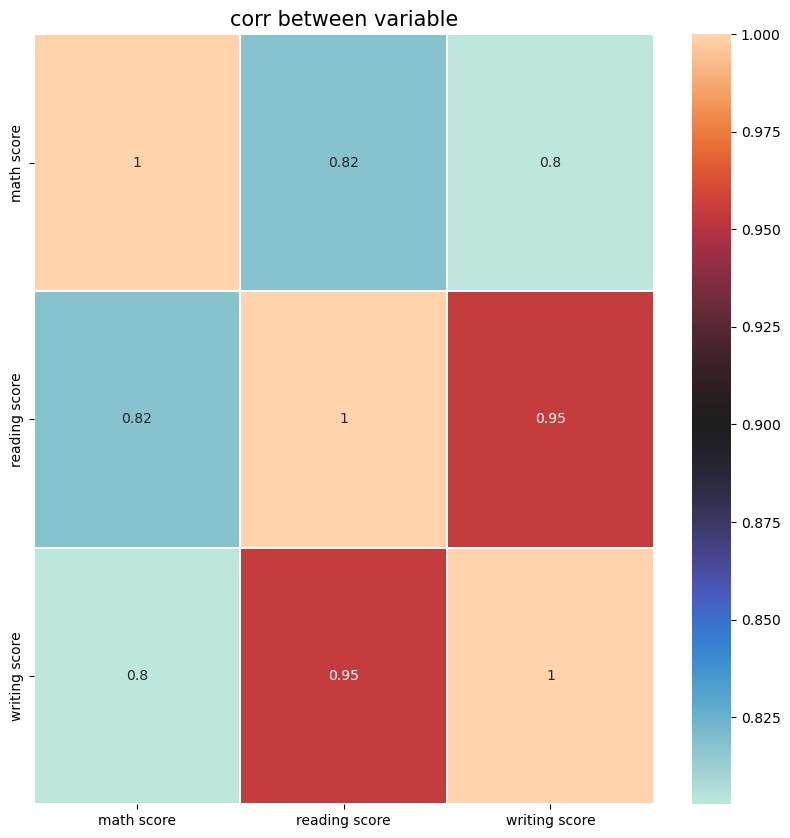

In [152]:
sns.heatmap(data_num.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("corr between variable",color='black',size=15)
plt.show()

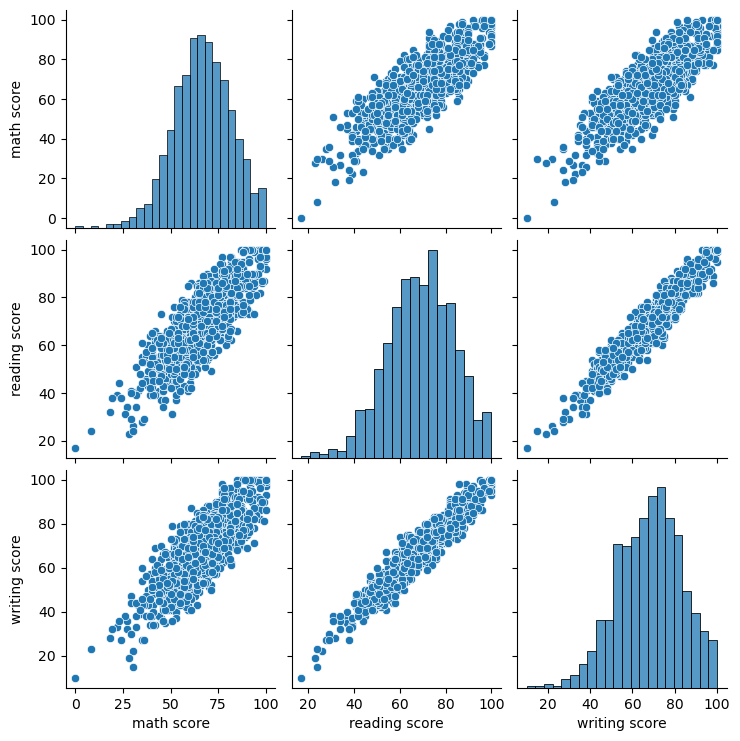

In [151]:
sns.pairplot(data_num)

<AxesSubplot:>

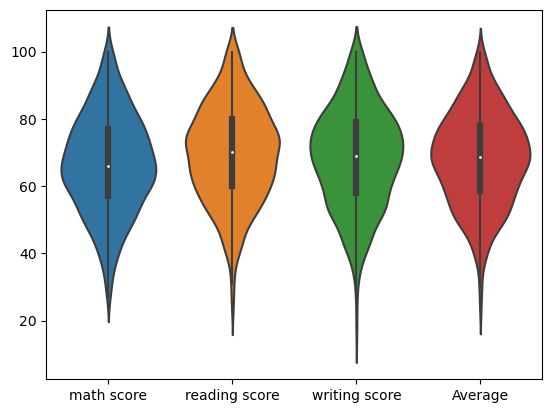

In [155]:
sns.violinplot(data=data)